# **1. Descripción del Proyecto**


Este proyecto forma parte del trabajo final de evaluación del Programa para Ciencia de los Datos del Instituto Tecnológico de Costa Rica.

Módulo: Aprendizaje Automático

Organizaciones: FUNDATEC, TEC

Estudiantes: Jorge Bulgarelli y Edwin Mejía.

**Instrucciones**

Aplicar los conocimientos del curso de aprendizaje automático a un problema, utilizando datos propios o bien datos no triviales.

<br>

**Descripción del área de aplicación**

Predecir con técnicas de aprendizaje automático los ingresos totales brutos de las personas personas ocupadas, tomando como referencia los datos de la Encuesta Continua de Empleo generada por el INEC para 2019, 2020 y los primeros 2 trimestres de 2021.

<br>

**Fuente de datos**


Este dataset es un extracto de los microdatos usados para la elaboración de la Encuesta Continua de Empleo generada por el INEC (Instituto de Estadística y Censo) de Costa Rica. Los datos comprenden información usada para la elaboración de los informes de los años 2019 (I, II, III y IV trimestre), 2020 (I, II, III y IV trimestre) y 2021 (I y II trimestre) y fueron otorgados para uso académico al estudiante Jorge Bulgarelli.

Dada la amplitud de los datos originales que suman aproximadamente 300 columnas (atributos), seleccionamos los atributos más significativos para este proyecto de aprendizaje automático. Las columnas seleccionadas preliminarmente para este proyecto son:

<br>

- **Edad**: ¿Cuántos años cumplidos tiene?
- **Sexo**: ¿Es hombre o mujer?
- **Idioma**: ¿Habla, lee y escribe fluidamente algún otro idioma aparte de su lengua materna?
- **Zona**: Zona de residencia. Posibles variables: Urbana o Rural.
- **Ocupacion_COCR11:** Calificación del grupo ocupacional.
- **Condicion_actividad**: No hay pregunta porque es una variable que se genera a partir de otra(as) variable(es). Posibles variables: Ocupado, Desempleado y Fuera de la fuerza de trabajo.
- **Ubicacion_empresa**: Provincia donde está ubicada la empresa del empleo principal.
- **Educacion_codigotitulo**: Código que se obtiene de la pregunta: ¿Cuál es el nombre de la carrera o especialidad que estudia o estudió (nombre)?
- **Amos_educacion**: Cantidad de años dedicados a la educación formal.
- **E8A**: ¿Por cúantas horas a la semana fue contratado(a) para realizar su jornada? 
- **Estabilidad_empleo**: No hay pregunta porque es una variable que se genera a partir de otra(as) variable(es). Ejemplo de variables: Permanente, Auxiliar no remunerado, Ocasional, etc.
- **Ingreso_bruto_total_trabajo**: Total de ingresos brutos en colones costarricenses.

Para una descripción más detallada de estos atributos se puede consultar la documentación oficial de la Encuesta Continua de Empleo en el siguiente enlace: http://sistemas.inec.cr/pad5/index.php/catalog/271/data-dictionary/F1?file_name=I%20Trimestre%202021

**Descripción de librerías a utilizar**
- Numpy es una librería que permite manipulación de estructuras de datos.
- Random es una librería para generar números aleatorios.
- Pandas es una librería que permite multiples manipulaciones de datos.
- Seaborn es una librería especializada en gráficos estadísticos.
- Matplotlib y mpl_toolkits.mplot3d son unas librerías de visualización.
- Scipy es una librería que contiene pruebas estadísticas.
- Sklearn.preprocessing es una librería de pre-procesado de datos.
- Sklearn, Sklearn.model_selection, Sklearn.ensemble y Sklearn.nueral_network son unas librerías de algoritmos de aprendizaje automático.
- Sklearn.metrics es una librería de métricas de evaluación de modelos.
- Warnings es una librería para ignorar ciertas advertencias 
- pd.set_option es una línea de código de Pandas que facilita la lectura de los datos, mostrando solamente n decimales de cada número.

In [1]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format','{:,.4f}'.format) 

# **2. Función de predicciones y evaluación de modelos**
Esta función permite evaluar modelos de regresión con base en las métricas MSE (Mean Squared Error), MAE (Mean Absolute Error) y R2 (Coeficiente de Correlación)

Parámetros de entrada:

- **modelo** = Algoritmo de Regresión
- **X_entrenamiento** = Subconjunto de Atributos de Entrenamiento
- **Y_entrenamiento** = Subconjunto de Objetivos de Entrenamiento
- **X_entrenamiento** = Subconjunto de Atributos de Prueba
- **Y_entrenamiento** = Subconjunto de Objetivos de Prueba

Salidas de función:
- **MSE_E** = Mean Squared Error Entrenamiento
- **MAE_E** = Mean Absolute Error Entrenamiento
- **R2_E** = Coeficiente de Correlación Entrenamiento
- **MSE_P** = Mean Squared Error Prueba
- **MAE_P** = Mean Absolute Error Prueba
- **R2_P** = Coeficiente de Correlación Prueba
- **Predicciones_entrenamiento** = Prediciones basadas en el Atributos y Objeticos de Entrenamiento
- **Predicciones_prueba** = Prediciones basadas en el Atributos y Objeticos de Prueba

In [2]:
def evaluador(modelo, X_entrenamiento, Y_entrenamiento, X_prueba, Y_prueba):
  
  # Realizar predicciones del modelo
  predicciones_entrenamiento = modelo.predict(X_entrenamiento)
  predicciones_prueba = modelo.predict(X_prueba)

  # Métricas de evaluación: entrenamiento
  MSE_E = mean_squared_error(Y_entrenamiento, predicciones_entrenamiento)
  MAE_E = mean_absolute_error(Y_entrenamiento, predicciones_entrenamiento)
  R2_E = r2_score(Y_entrenamiento, predicciones_entrenamiento)
  
  # Métricas de evaluación: prueba
  MSE_P = mean_squared_error(Y_prueba, predicciones_prueba)
  MAE_P = mean_absolute_error(Y_prueba, predicciones_prueba)
  R2_P = r2_score(Y_prueba, predicciones_prueba)
  
  return MSE_E, MAE_E, R2_E, MSE_P, MAE_P, R2_P, predicciones_entrenamiento, predicciones_prueba

### **2.1 Descripción Métricas de Evaluación**

- **Error absoluto medio, MAE:** Es una medida de la diferencia entre dos variables continuas.
- **Error cuadrático medio, MSE:** Mide la cantidad de error que hay entre dos conjuntos de datos. En otras palabras, compara un valor predicho y un valor observado o conocido.
- **Coeficiente de Correlación/Determinación, R²:** Es un estadístico usado en el contexto de un modelo estadístico cuyo principal propósito es predecir futuros resultados o probar una hipótesis.

# **3. Pre-Procesado Datos**

### **3.1 Carga y limpieza de datos**

**Cargar Datos**

Para facilidad del lectura el extracto de los datos fue colocado en un repositorio de Github. Este archivo contiene únicamente los atributos antes mencionados y no es posible ubicar a los participantes de la encuenta dado que no hay ningún dato como nombre o número de identificación. Dada las limitantes de Github para almacenar archivos en formato .csv superiores a 25mb el archivo fue dividido en 3 partes. Se procede a cargarlos.

In [3]:
url1 = 'https://raw.githubusercontent.com/feanor294/datasets/main/RawData2021.csv'
df1 = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/feanor294/datasets/main/RawData2020.csv'
df2 = pd.read_csv(url2)

url3 = 'https://raw.githubusercontent.com/feanor294/datasets/main/RawData2019.csv'
df3 = pd.read_csv(url2)

df = pd.concat([df1, df2, df3], axis = 0 )

**Selección de atributos iniciales**

Para el enfoque de este proyecto se procede a remover ciertas columnas, quedando las que se considera que aportarán valor a la solución del problema a resolver con aprendizaje automático. Las columnas a utilizar serán:

In [4]:
df = df[['Edad', 'Sexo', 'Idioma','Zona','Calificacion_ocupacion_COCR11', 'Condicion_actividad','Ubicacion_empresa','Educacion_codigotitulo','Amos_educacion','E8A','Estabilidad_empleo',
       'Ingreso_bruto_total_trabajo']]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225157 entries, 0 to 89076
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Edad                           225157 non-null  object 
 1   Sexo                           225157 non-null  object 
 2   Idioma                         175034 non-null  object 
 3   Zona                           225157 non-null  object 
 4   Calificacion_ocupacion_COCR11  78534 non-null   object 
 5   Condicion_actividad            175034 non-null  object 
 6   Ubicacion_empresa              78534 non-null   object 
 7   Educacion_codigotitulo         37498 non-null   object 
 8   Amos_educacion                 175034 non-null  object 
 9   E8A                            55209 non-null   object 
 10  Estabilidad_empleo             78534 non-null   object 
 11  Ingreso_bruto_total_trabajo    68840 non-null   float64
dtypes: float64(1), object(11)
memor

**Preprocesado de columnas**

Renombrar columna E8A

In [5]:
df.rename(columns = {'E8A': 'Jornada_Laboral'}, inplace = True)

Con el siguiente ciclo, se imprime para cada columna los valores únicos contenidos para definir el tipo de preprocesado a realizar. Esto dará una idea del tipo de preprocesado que se aplica a cada columna.

In [6]:
columnas = df.columns

for value in columnas:
    
    print(f'Columna {value}')
    print(df[value].unique(), '\n')

Columna Edad
['76.0' '74.0' '43.0' '39.0' '9.0' '38.0' '33.0' '14.0' '1.0' '46.0'
 '31.0' '13.0' '2.0' '73.0' '65.0' '59.0' '32.0' '30.0' '27.0' '75.0'
 '69.0' '29.0' '21.0' '48.0' '40.0' '25.0' '19.0' '50.0' '4.0' '5.0'
 '22.0' '23.0' '37.0' '56.0' '6.0' '35.0' '54.0' '16.0' '83.0' '58.0'
 '36.0' '18.0' '52.0' '57.0' '55.0' '26.0' '63.0' '17.0' '62.0' '64.0'
 '42.0' '51.0' '28.0' '34.0' '77.0' '60.0' '61.0' '47.0' '45.0' '12.0'
 '82.0' '67.0' '80.0' '88.0' '93.0' '72.0' '71.0' '66.0' '49.0' '8.0'
 '11.0' '15.0' '3.0' '10.0' '24.0' '84.0' '41.0' '7.0' '53.0' '70.0'
 '79.0' '90.0' '44.0' '68.0' '78.0' '20.0' 'Menor de un año' '86.0' '81.0'
 'Mayor de 15 años con edad ignorada' '91.0' '87.0' '92.0' '85.0'
 '97 años y más' '94.0' '89.0' '96.0' '95.0'
 'Menor de 15 años con edad ignorada'] 

Columna Sexo
['Hombre' 'Mujer'] 

Columna Idioma
['No' 'Sí' nan] 

Columna Zona
['Urbana' 'Rural'] 

Columna Calificacion_ocupacion_COCR11
[nan 'Ocupación calificada alta' 'Ocupación no calificada'
 'O

Dado que se identifican muchos NaNs (non numeric values), se eliminan. 

In [7]:
for value in columnas:

    if df[value].isnull().values.any() == True:
        print(f'Columna {value} contine valores nulos')
        df.dropna(subset = [value], inplace=True) 
        print(f'Valores nulos de columna {value} fueron eliminados\n')
    
    else:
        print(f'Columna {value} no contine valores nulos\n')

Columna Edad no contine valores nulos

Columna Sexo no contine valores nulos

Columna Idioma contine valores nulos
Valores nulos de columna Idioma fueron eliminados

Columna Zona no contine valores nulos

Columna Calificacion_ocupacion_COCR11 contine valores nulos
Valores nulos de columna Calificacion_ocupacion_COCR11 fueron eliminados

Columna Condicion_actividad no contine valores nulos

Columna Ubicacion_empresa no contine valores nulos

Columna Educacion_codigotitulo contine valores nulos
Valores nulos de columna Educacion_codigotitulo fueron eliminados

Columna Amos_educacion no contine valores nulos

Columna Jornada_Laboral contine valores nulos
Valores nulos de columna Jornada_Laboral fueron eliminados

Columna Estabilidad_empleo no contine valores nulos

Columna Ingreso_bruto_total_trabajo contine valores nulos
Valores nulos de columna Ingreso_bruto_total_trabajo fueron eliminados



Se valida nuevamente si hay valores nulos en conjunto de datos. También se valida los tipos de datos.

In [8]:
print('¿Hay datos nulos? ',df.isnull().values.any(), '\n')

¿Hay datos nulos?  False 



Se removerá del conjunto de datos las líneas que contengan en la Columna Edad los valores 'Menor de un año' y 'Menor de 15 años con edad ignorada'; y se reemplazarán los datos 'Mayor de 15 años con edad ignorada' por 15 y las líneas '97 años y más' por 97. Por último, se transforma la columna Edad a formato númerico.

In [9]:
df = df[df['Edad'] != 'Menor de un año']
df = df[df['Edad'] != 'Menor de 15 años con edad ignorada']
df['Edad'].replace(regex= 'Mayor de 15 años con edad ignorada', value=15, inplace = True)
df['Edad'].replace(regex= '97 años y más', value=97, inplace = True)
df.head()

,Edad,Sexo,Idioma,Zona,Calificacion_ocupacion_COCR11,Condicion_actividad,Ubicacion_empresa,Educacion_codigotitulo,Amos_educacion,Jornada_Laboral,Estabilidad_empleo,Ingreso_bruto_total_trabajo
15,65.0,Mujer,No,Urbana,Ocupación no calificada,Ocupado,San José,11.0,15.0,Más de 48 horas,Permanente,"284,166.6667"
16,59.0,Mujer,No,Urbana,Ocupación calificada alta,Ocupado,San José,11.0,15.0,De 40 a 48 horas,Permanente,"704,166.6667"
18,30.0,Hombre,Sí,Urbana,Ocupación calificada alta,Ocupado,San José,45.0,13.0,Más de 48 horas,Permanente,"812,500.0000"
19,27.0,Mujer,Sí,Urbana,Ocupación calificada alta,Ocupado,San José,31.0,14.0,Más de 48 horas,Permanente,"510,000.0000"
70,36.0,Hombre,Sí,Urbana,Ocupación calificada media,Ocupado,San José,37.0,15.0,Más de 48 horas,Permanente,"455,000.0000"


Reemplazar valor 'Ignorado' con un 99, esto de acuerdo a los valores dados por el diccionario de atributos de INEC (enlace en la descripción).

In [10]:
df['Educacion_codigotitulo'].replace(regex= 'Ignorado', value=99, inplace = True)

Conversión de columnas con formato texto a formato numérico.

In [11]:
df['Edad'] = df['Edad'].astype('float')
df['Educacion_codigotitulo'] = df['Educacion_codigotitulo'].astype('float')
df['Amos_educacion'] = df['Amos_educacion'].astype('float')
df['Ingreso_bruto_total_trabajo'] = df['Ingreso_bruto_total_trabajo'].astype('float')

Ahora, se procederá a binarizar de las columnas Sexo, Idioma y Zona. Se utilizarán dictionarios de python para cambiar las columnas que sólo tienen 2 posibles valores. El proceso a ejecutar seguirá la misma estructura: 1) Crear diccionario, 2) Convertir la columna a lista y 3) Reemplazar los valores con los datos asignados en el diccionario. 

In [12]:
# Binarización columna Sexo

# Crear dictionario
sexo = {'Hombre' : 0 , 'Mujer' : 1}
# Convertir columna a lista
columna_lista= df['Sexo'].tolist()
# Reemplazar valores
df['Sexo'] = [sexo.get(n, n) for n in columna_lista]

# Binarización columna Idioma

# Crear dictionario
idioma = {'No' : 0 , 'Sí' : 1}
# Convertir columna a lista
columna_lista= df['Idioma'].tolist()
#Reemplazar valores
df['Idioma'] = [idioma.get(n, n) for n in columna_lista]

# Binarización columna Zona

# Crear dictionario
zona = {'Rural' : 0 , 'Urbana' : 1}
# Convertir columna a lista
columna_lista= df['Zona'].tolist()
#Reemplazar valores
df['Zona'] = [zona.get(n, n) for n in columna_lista]

df.head()

,Edad,Sexo,Idioma,Zona,Calificacion_ocupacion_COCR11,Condicion_actividad,Ubicacion_empresa,Educacion_codigotitulo,Amos_educacion,Jornada_Laboral,Estabilidad_empleo,Ingreso_bruto_total_trabajo
15,65.0000,1,0,1,Ocupación no calificada,Ocupado,San José,11.0000,15.0000,Más de 48 horas,Permanente,"284,166.6667"
16,59.0000,1,0,1,Ocupación calificada alta,Ocupado,San José,11.0000,15.0000,De 40 a 48 horas,Permanente,"704,166.6667"
18,30.0000,0,1,1,Ocupación calificada alta,Ocupado,San José,45.0000,13.0000,Más de 48 horas,Permanente,"812,500.0000"
19,27.0000,1,1,1,Ocupación calificada alta,Ocupado,San José,31.0000,14.0000,Más de 48 horas,Permanente,"510,000.0000"
70,36.0000,0,1,1,Ocupación calificada media,Ocupado,San José,37.0000,15.0000,Más de 48 horas,Permanente,"455,000.0000"


Remoción de las líneas cuya Condicion_actividad sea igual a Desocupado e Ingreso_bruto_total_trabajo igual a 0.

In [13]:
df = df[df['Condicion_actividad'] != 0]
df = df[df['Ingreso_bruto_total_trabajo'] != 0]
df.head()

,Edad,Sexo,Idioma,Zona,Calificacion_ocupacion_COCR11,Condicion_actividad,Ubicacion_empresa,Educacion_codigotitulo,Amos_educacion,Jornada_Laboral,Estabilidad_empleo,Ingreso_bruto_total_trabajo
15,65.0000,1,0,1,Ocupación no calificada,Ocupado,San José,11.0000,15.0000,Más de 48 horas,Permanente,"284,166.6667"
16,59.0000,1,0,1,Ocupación calificada alta,Ocupado,San José,11.0000,15.0000,De 40 a 48 horas,Permanente,"704,166.6667"
18,30.0000,0,1,1,Ocupación calificada alta,Ocupado,San José,45.0000,13.0000,Más de 48 horas,Permanente,"812,500.0000"
19,27.0000,1,1,1,Ocupación calificada alta,Ocupado,San José,31.0000,14.0000,Más de 48 horas,Permanente,"510,000.0000"
70,36.0000,0,1,1,Ocupación calificada media,Ocupado,San José,37.0000,15.0000,Más de 48 horas,Permanente,"455,000.0000"


Aplicación de One-Hot Encoding a las columnas Nivel_educativo, Especialidad_estudio, Region, Estabilidad_empleo, Rama_actividad, Jornada_Laboral generando para cada columna transformada un nuevo conjunto de datos. Posteriormente, se agregan los cojuntos de datos generados por One-hot Encoding al conjunto de datos principal.

In [14]:
# Columna Calificacion_ocupacion_COCR11
Calificacion_ocupacion_COCR11_dummy = pd.get_dummies(df['Calificacion_ocupacion_COCR11'], prefix = 'Calificacion')

# Columna Ubicacion_empresa
Ubicacion_empresa_dummy = pd.get_dummies(df['Ubicacion_empresa'], prefix = 'Ubicacion')

# Columna Jornada_Laboral
Jornada_Laboral_dummy = pd.get_dummies(df['Jornada_Laboral'], prefix = 'Jornada')

# Columna Jornada_Laboral
Estabilidad_empleo_dummy = pd.get_dummies(df['Estabilidad_empleo'], prefix = 'Estabilidad')

df = pd.concat([df, Calificacion_ocupacion_COCR11_dummy, Ubicacion_empresa_dummy, Jornada_Laboral_dummy, Estabilidad_empleo_dummy], axis = 1)
df.head()

,Edad,Sexo,Idioma,Zona,Calificacion_ocupacion_COCR11,Condicion_actividad,Ubicacion_empresa,Educacion_codigotitulo,Amos_educacion,Jornada_Laboral,...,Ubicacion_Puntarenas,Ubicacion_San José,Jornada_De 15 a menos de 40 horas,Jornada_De 40 a 48 horas,Jornada_Menos de 15 horas,Jornada_Más de 48 horas,Jornada_Otro tipo,Estabilidad_No permanente,Estabilidad_Ocasional,Estabilidad_Permanente
15,65.0000,1,0,1,Ocupación no calificada,Ocupado,San José,11.0000,15.0000,Más de 48 horas,...,0,1,0,0,0,1,0,0,0,1
16,59.0000,1,0,1,Ocupación calificada alta,Ocupado,San José,11.0000,15.0000,De 40 a 48 horas,...,0,1,0,1,0,0,0,0,0,1
18,30.0000,0,1,1,Ocupación calificada alta,Ocupado,San José,45.0000,13.0000,Más de 48 horas,...,0,1,0,0,0,1,0,0,0,1
19,27.0000,1,1,1,Ocupación calificada alta,Ocupado,San José,31.0000,14.0000,Más de 48 horas,...,0,1,0,0,0,1,0,0,0,1
70,36.0000,0,1,1,Ocupación calificada media,Ocupado,San José,37.0000,15.0000,Más de 48 horas,...,0,1,0,0,0,1,0,0,0,1


Agregar el caracter '_' a los espacios en blanco en los títulos de las columnas y reiniciar índice.

In [15]:
df.columns = [c.replace(' ', '_') for c in df.columns]

# Reiniciar índice
df = df.reset_index(drop=True)
df.head()

,Edad,Sexo,Idioma,Zona,Calificacion_ocupacion_COCR11,Condicion_actividad,Ubicacion_empresa,Educacion_codigotitulo,Amos_educacion,Jornada_Laboral,...,Ubicacion_Puntarenas,Ubicacion_San_José,Jornada_De_15_a_menos_de_40_horas,Jornada_De_40_a_48_horas,Jornada_Menos_de_15_horas,Jornada_Más_de_48_horas,Jornada_Otro_tipo,Estabilidad_No_permanente,Estabilidad_Ocasional,Estabilidad_Permanente
0,65.0000,1,0,1,Ocupación no calificada,Ocupado,San José,11.0000,15.0000,Más de 48 horas,...,0,1,0,0,0,1,0,0,0,1
1,59.0000,1,0,1,Ocupación calificada alta,Ocupado,San José,11.0000,15.0000,De 40 a 48 horas,...,0,1,0,1,0,0,0,0,0,1
2,30.0000,0,1,1,Ocupación calificada alta,Ocupado,San José,45.0000,13.0000,Más de 48 horas,...,0,1,0,0,0,1,0,0,0,1
3,27.0000,1,1,1,Ocupación calificada alta,Ocupado,San José,31.0000,14.0000,Más de 48 horas,...,0,1,0,0,0,1,0,0,0,1
4,36.0000,0,1,1,Ocupación calificada media,Ocupado,San José,37.0000,15.0000,Más de 48 horas,...,0,1,0,0,0,1,0,0,0,1


## **3.2 Generación de datos sintéticos**

Dada la naturaleza del problema y según las fuentes consultadas, para hacer una buena predición de los ingresos brutos de los individuos de una población es recomendable disponer de datos como: Años de Experiencia, Educación y Rangos de Salario por profesión. La encuesta Continua de Empleo recopila como parte de sus metas el monto total de ingresos brutos por lo que sólo resta definir los rangos inferior y superior.
Primero, se calcula el Coeficiente de Variación a partir de la Media y la Desviación Estándar de los Salarios; luego se invierte el Coeficiente para calcular el Factor de Escalamiento.
Segundo, se calcula el producto del Factor y el Ingreso bruto y se suma o resta, según sea el caso, para obtener el Techo y el Piso, respectivamente.

In [16]:
#Extracion de columna del dataset principal
Salarios = df[['Ingreso_bruto_total_trabajo']]

#Calculo de la Media
Media = Salarios['Ingreso_bruto_total_trabajo'].mean()

#Calculo de la Desviacion Estandar
Dsv_Stdr = Salarios['Ingreso_bruto_total_trabajo'].std()

#Definir Factor de Escalamiento 
Coeficiente_Variacion = Media / Dsv_Stdr
Factor_escalamiento = 1 / Coeficiente_Variacion

#Calculo del Piso_Salario
Pisos = Salarios - (Factor_escalamiento * Salarios)
df['Piso_Salario'] = Pisos

#Calculo del Techo_Salario
Techos = Salarios + (Factor_escalamiento * Salarios)
df['Techo_Salario'] = Techos

Se reordenan los datos para colocar la columna objetivo al final del conjunto de datos. Se remueven las columnas Nivel_educativo y Region que, al tener un valor constante luego del prepocesado, no serán de utilidad para el modelo de aprendizaje automático a utilizar.

In [17]:
df = df[['Edad', 'Sexo', 'Idioma', 'Zona',
       'Educacion_codigotitulo',
       'Amos_educacion',
       'Calificacion_No_especificado',
       'Calificacion_Ocupación_calificada_alta',
       'Calificacion_Ocupación_calificada_media',
       'Calificacion_Ocupación_no_calificada', 'Ubicacion_Alajuela',
       'Ubicacion_Cartago', 'Ubicacion_Guanacaste', 'Ubicacion_Heredia',
       'Ubicacion_Limón', 'Ubicacion_No_especificado', 'Ubicacion_Otro_país',
       'Ubicacion_Puntarenas', 'Ubicacion_San_José',
       'Jornada_De_15_a_menos_de_40_horas', 'Jornada_De_40_a_48_horas',
       'Jornada_Menos_de_15_horas', 'Jornada_Más_de_48_horas',
       'Jornada_Otro_tipo', 'Estabilidad_No_permanente',
       'Estabilidad_Ocasional', 'Estabilidad_Permanente', 'Piso_Salario','Techo_Salario','Ingreso_bruto_total_trabajo']]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15242 entries, 0 to 15241
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Edad                                     15242 non-null  float64
 1   Sexo                                     15242 non-null  int64  
 2   Idioma                                   15242 non-null  int64  
 3   Zona                                     15242 non-null  int64  
 4   Educacion_codigotitulo                   15242 non-null  float64
 5   Amos_educacion                           15242 non-null  float64
 6   Calificacion_No_especificado             15242 non-null  uint8  
 7   Calificacion_Ocupación_calificada_alta   15242 non-null  uint8  
 8   Calificacion_Ocupación_calificada_media  15242 non-null  uint8  
 9   Calificacion_Ocupación_no_calificada     15242 non-null  uint8  
 10  Ubicacion_Alajuela                       15242

### **3.2 Análisis Exploratorio de Datos**

Utilizando la función Pairplot de Seaborn, se visualizarán los gráficos individuales por pares de atributos.

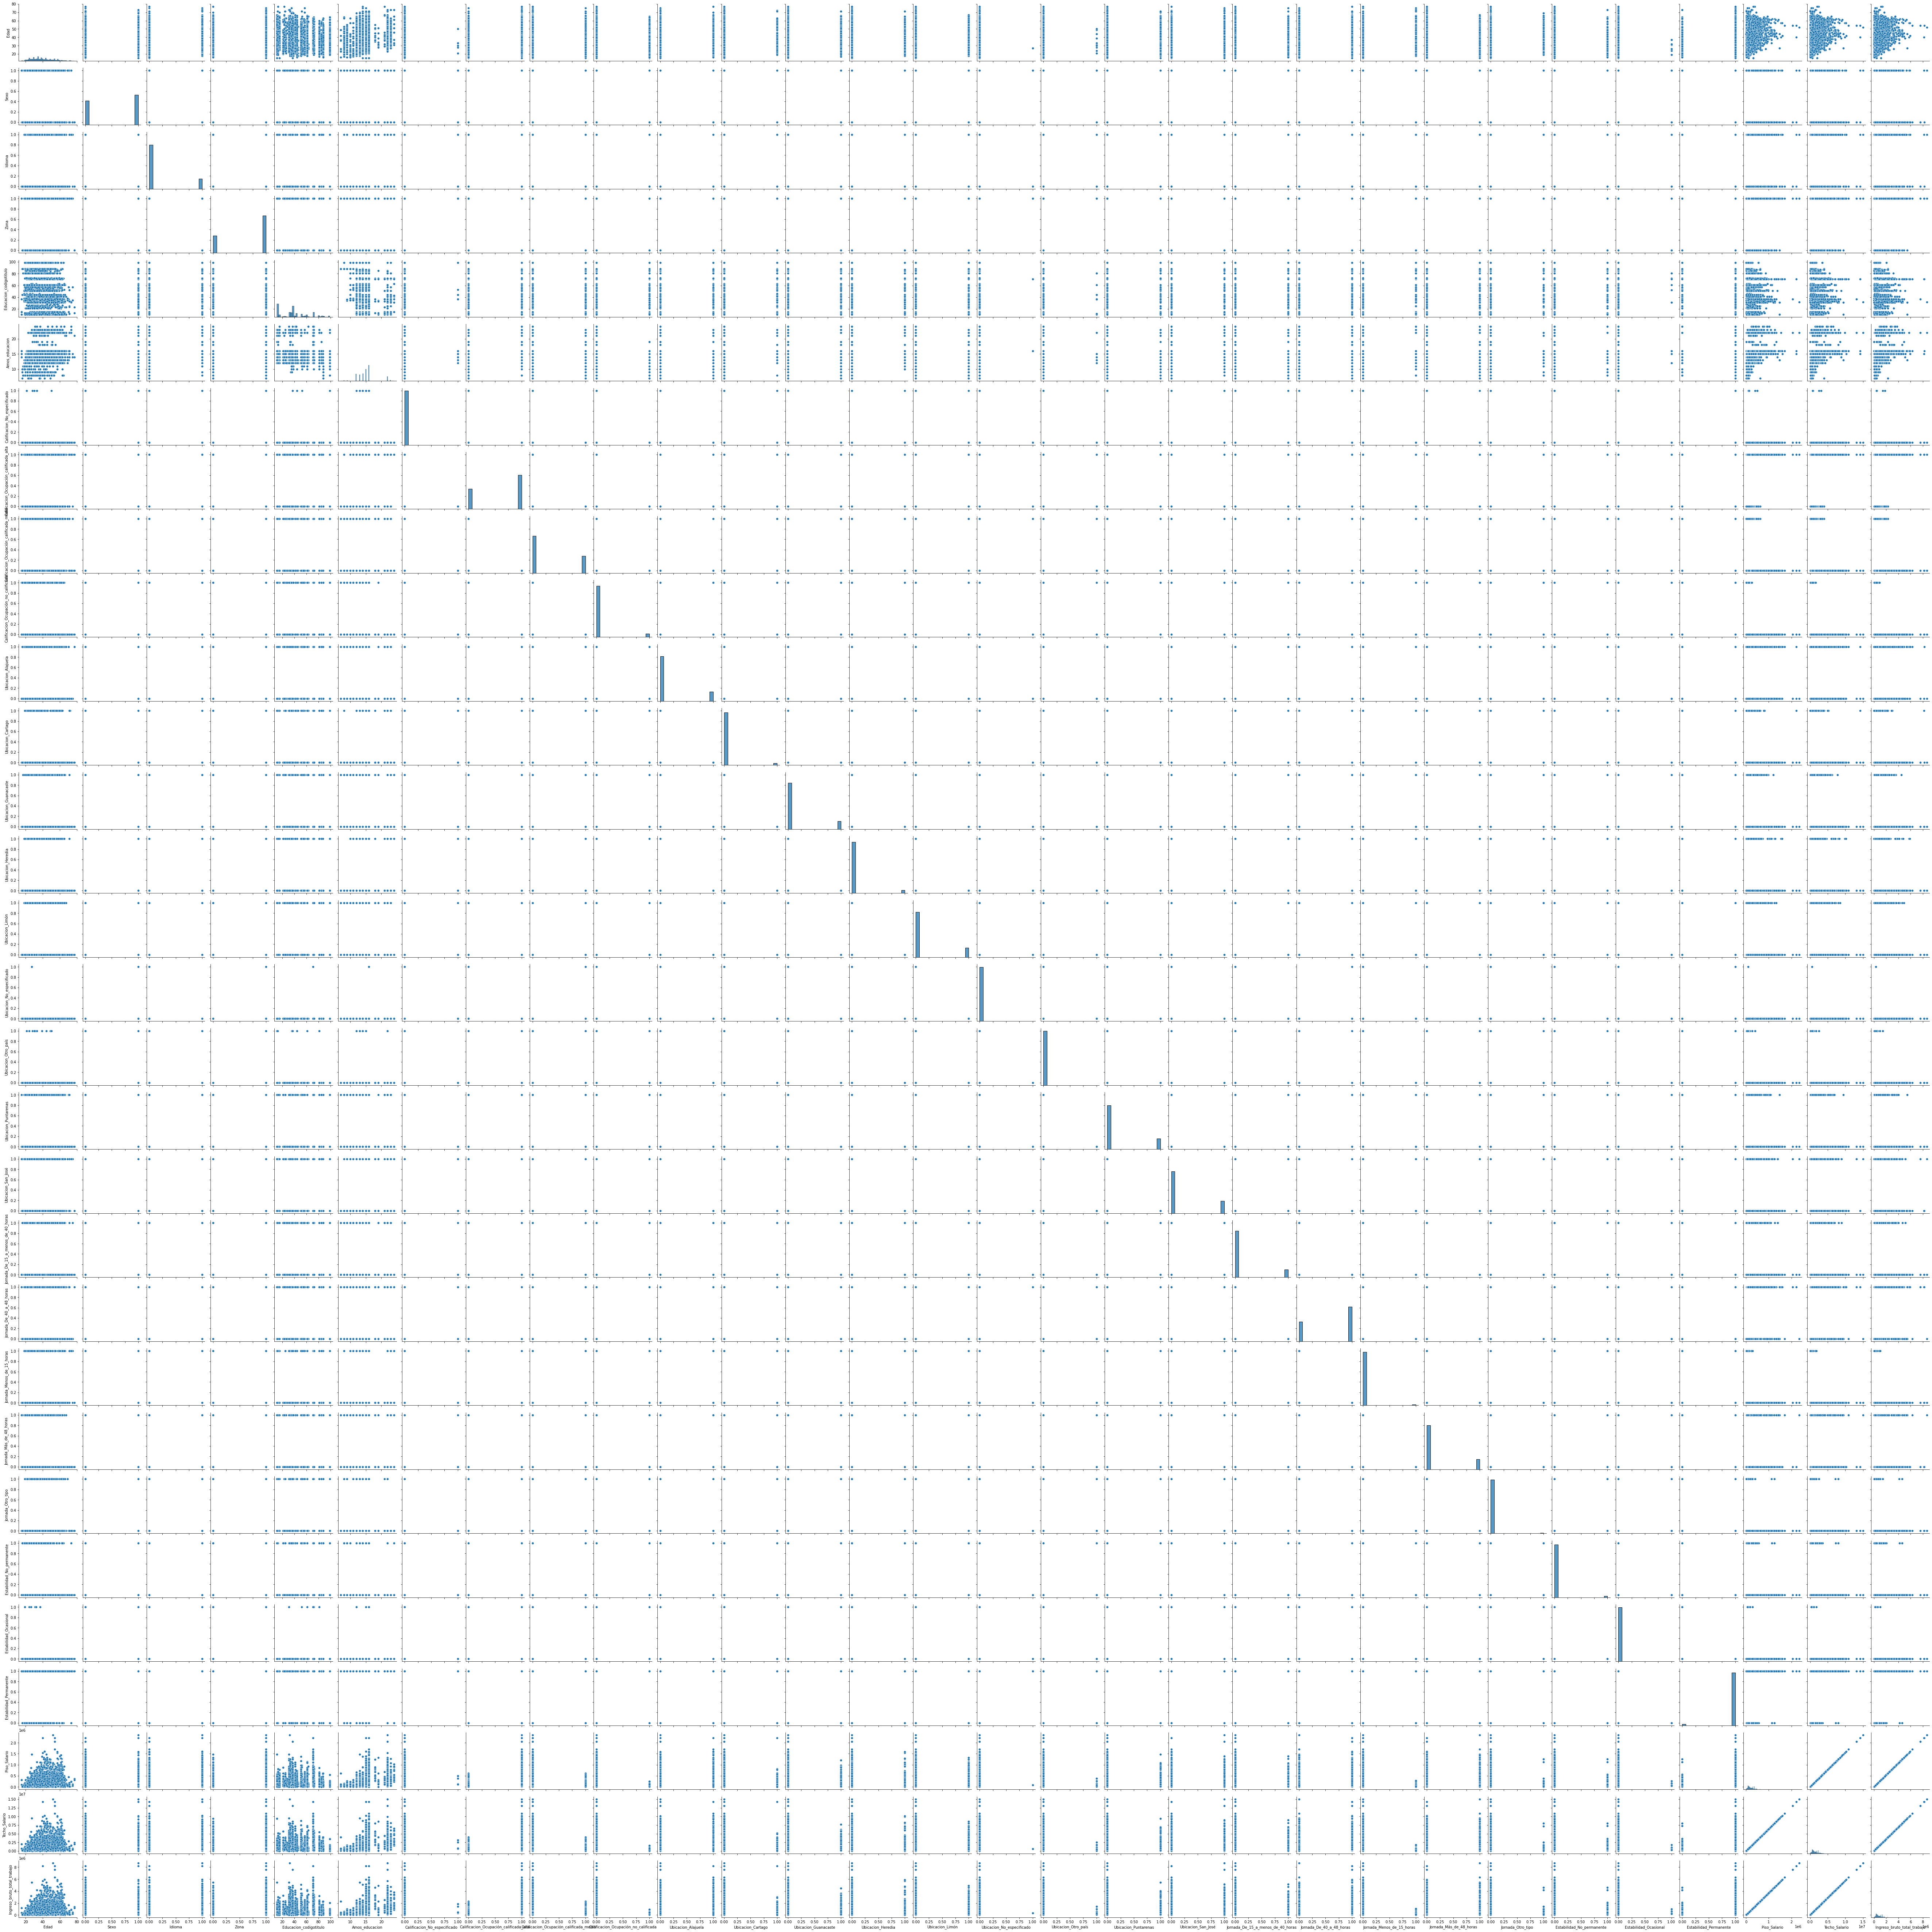

In [19]:
sns.pairplot(df)

La siguiente función de librería crea un mapa de calor utilizando Seaborn. Con esta función es posible identificar correlaciones entre los atributos del set de datos.

<AxesSubplot:title={'center':'Matriz de Correlaciones'}>

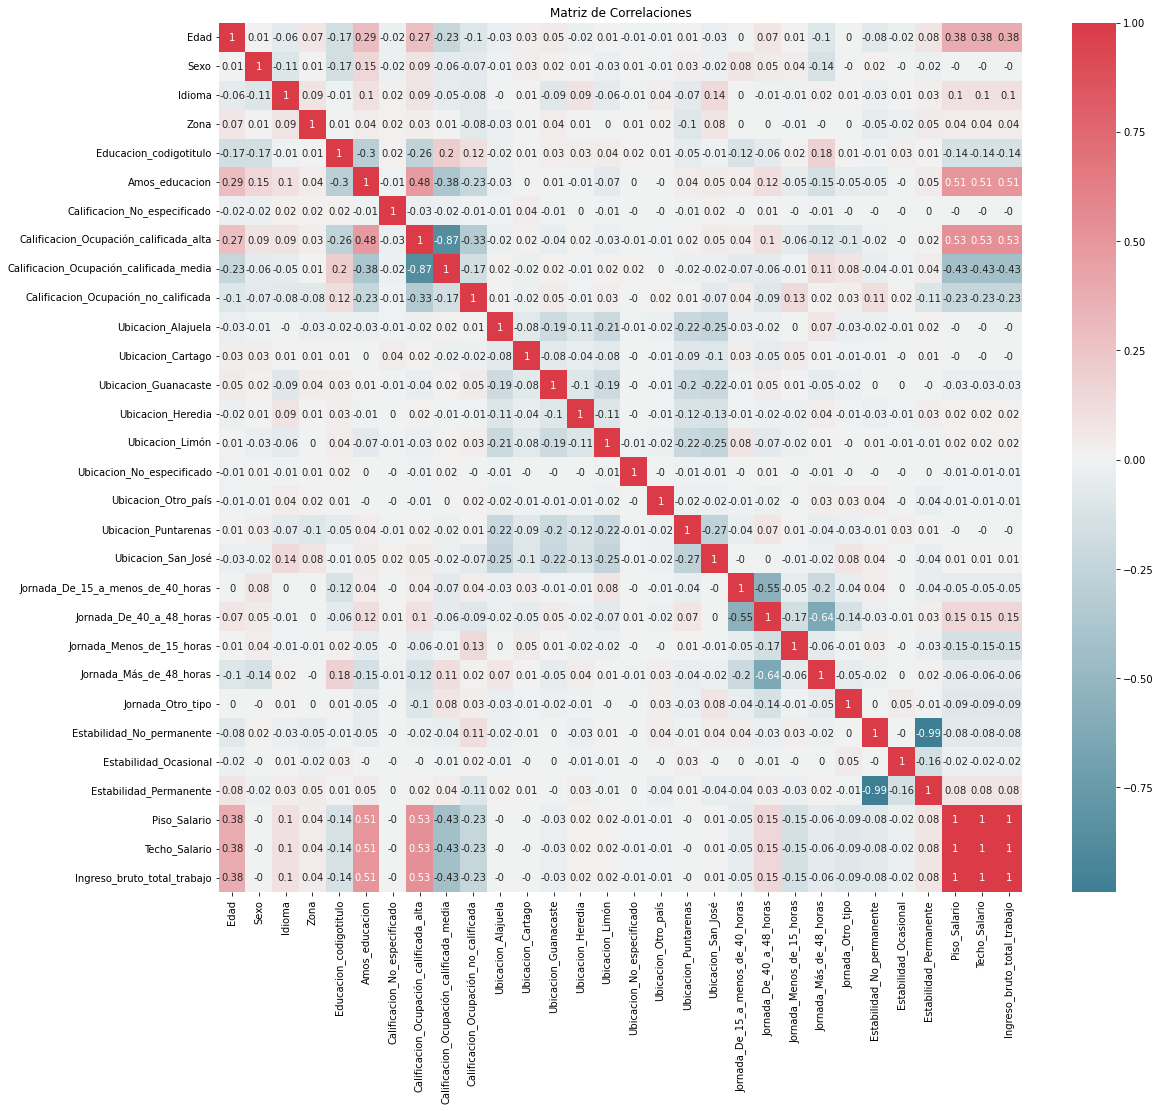

In [20]:
plt.figure(figsize=(18, 16))
plt.title('Matriz de Correlaciones')
colormap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(round(df.corr(), 2), annot=True, cmap=colormap)

### **3.3 Escalamiento de Datos**

 **Definir si Estandarizar o Normalizar**

- **Normalizar** consiste en reescalar los datos entre un rango de 0 y 1. Fórmula para normalización dada por:
$\displaystyle x \ normalizado = \frac{x \ - \ min(x)}{max(x)\ - \ min (x) }$
La normalización es una buena técnica para usar cuando no conoce la distribución de sus datos o cuando sabe que la distribución no es gaussiana (una curva de campana).


- **Estandarizar** consiste en reescalar para obtener una media de 0 y una desviación estandar de 1. Fórmula para estandarización dada por:
$\displaystyle x \ estandarizado = \frac{x \ - \mu}{\sigma }$
Donde $\mu$ corrresponde a la media de los datos y  $\sigma$ a la desviación estándar de los datos. La estandarización asume que sus datos tienen una distribución gaussiana (curva de campana).

Para decidir cual transfomación aplicar, es necesario probar la normalidad o no de la distribución de los datos. Hay diferentes formas de realizar estas pruebas, para este caso se usarán 2 pruebas: una visual y otra estadistica. 

**Prueba visual de distribución normal con librería Seaborn**

<AxesSubplot:ylabel='Density'>

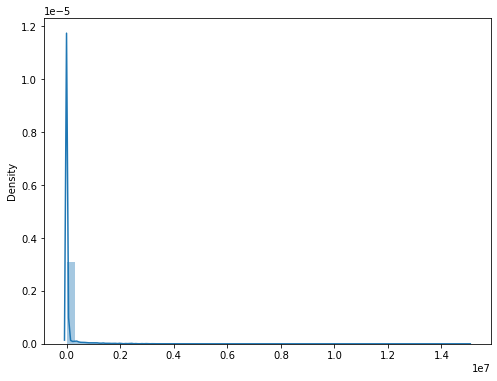

In [21]:
plt.figure(figsize=(8, 6))
sns.distplot(df)

**Prueba estadística de distribución normal con librería Shapiro**

In [22]:
stat, p = shapiro(df)
print(f'stat = {stat:.3f}, p = {p:.3f}\n' )

if p > 0.05:
    print('Probabilidad Gausiana')
else:
    print('Probabilidad No Gausiana')

stat = 0.239, p = 0.000

Probabilidad No Gausiana


Ambas pruebas demuestran que el set de datos no presenta un distribución normal. Por lo que se procede a Normalizar estos datos.

**Normalización de datos**

In [23]:
maximo = df.max()
minimo = df.min()

df_normalizado = ( df - minimo ) / ( maximo - minimo)

df_normalizado

,Edad,Sexo,Idioma,Zona,Educacion_codigotitulo,Amos_educacion,Calificacion_No_especificado,Calificacion_Ocupación_calificada_alta,Calificacion_Ocupación_calificada_media,Calificacion_Ocupación_no_calificada,...,Jornada_De_40_a_48_horas,Jornada_Menos_de_15_horas,Jornada_Más_de_48_horas,Jornada_Otro_tipo,Estabilidad_No_permanente,Estabilidad_Ocasional,Estabilidad_Permanente,Piso_Salario,Techo_Salario,Ingreso_bruto_total_trabajo
0,0.8065,1.0000,0.0000,1.0000,0.0000,0.4706,0.0000,0.0000,0.0000,1.0000,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0322,0.0322,0.0322
1,0.7097,1.0000,0.0000,1.0000,0.0000,0.4706,0.0000,1.0000,0.0000,0.0000,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0807,0.0807,0.0807
2,0.2419,0.0000,1.0000,1.0000,0.3864,0.3529,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0932,0.0932,0.0932
3,0.1935,1.0000,1.0000,1.0000,0.2273,0.4118,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0583,0.0583,0.0583
4,0.3387,0.0000,1.0000,1.0000,0.2955,0.4706,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0520,0.0520,0.0520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15237,0.6452,1.0000,0.0000,1.0000,0.0000,0.5294,0.0000,1.0000,0.0000,0.0000,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.2064,0.2064,0.2064
15238,0.2097,1.0000,0.0000,1.0000,0.2955,0.2941,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0495,0.0495,0.0495
15239,0.4516,0.0000,0.0000,0.0000,0.0114,0.4118,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0602,0.0602,0.0602
15240,0.3387,0.0000,1.0000,0.0000,0.0000,0.5294,0.0000,1.0000,0.0000,0.0000,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.1130,0.1130,0.1130


### **3.4 Sepración de Datos para Entrenamiento y Prueba**

Separar del conjunto de datos los atributos (X) y los objetivos (y).

In [24]:
numero_columnas = len(df.columns)

# X
df_normalizado_x = df_normalizado.iloc[: , : numero_columnas - 1]
df_normalizado_x.head()

,Edad,Sexo,Idioma,Zona,Educacion_codigotitulo,Amos_educacion,Calificacion_No_especificado,Calificacion_Ocupación_calificada_alta,Calificacion_Ocupación_calificada_media,Calificacion_Ocupación_no_calificada,...,Jornada_De_15_a_menos_de_40_horas,Jornada_De_40_a_48_horas,Jornada_Menos_de_15_horas,Jornada_Más_de_48_horas,Jornada_Otro_tipo,Estabilidad_No_permanente,Estabilidad_Ocasional,Estabilidad_Permanente,Piso_Salario,Techo_Salario
0,0.8065,1.0000,0.0000,1.0000,0.0000,0.4706,0.0000,0.0000,0.0000,1.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0322,0.0322
1,0.7097,1.0000,0.0000,1.0000,0.0000,0.4706,0.0000,1.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0807,0.0807
2,0.2419,0.0000,1.0000,1.0000,0.3864,0.3529,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0932,0.0932
3,0.1935,1.0000,1.0000,1.0000,0.2273,0.4118,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0583,0.0583
4,0.3387,0.0000,1.0000,1.0000,0.2955,0.4706,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0520,0.0520


In [25]:
# y
df_normalizado_y = df_normalizado.iloc[: , numero_columnas - 1:numero_columnas]
df_normalizado_y.head()

,Ingreso_bruto_total_trabajo
0,0.0322
1,0.0807
2,0.0932
3,0.0583
4,0.0520


 **Definir los subconjuntos de entrenamiento y de prueba y definir la proción de cada uno**

Con los datos transformados se procederá a separar en los subconjuntos de entrenamiento y de prueba utilizando una proporción de 80/20 mediante la función train_test_split de la librería sklearn.model_selection

In [26]:
atributos_entrenamiento, atributos_prueba, objetivos_entrenamiento, objetivos_prueba = train_test_split(df_normalizado_x, df_normalizado_y, test_size=0.2, random_state=42)

In [27]:
atributos_entrenamiento.head()

,Edad,Sexo,Idioma,Zona,Educacion_codigotitulo,Amos_educacion,Calificacion_No_especificado,Calificacion_Ocupación_calificada_alta,Calificacion_Ocupación_calificada_media,Calificacion_Ocupación_no_calificada,...,Jornada_De_15_a_menos_de_40_horas,Jornada_De_40_a_48_horas,Jornada_Menos_de_15_horas,Jornada_Más_de_48_horas,Jornada_Otro_tipo,Estabilidad_No_permanente,Estabilidad_Ocasional,Estabilidad_Permanente,Piso_Salario,Techo_Salario
1520,0.3226,0.0000,1.0000,1.0000,0.5114,0.2941,0.0000,0.0000,1.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0470,0.0470
13569,0.6935,1.0000,0.0000,0.0000,0.2386,0.3529,0.0000,1.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.1187,0.1187
5981,0.5323,0.0000,1.0000,1.0000,0.0227,0.4706,0.0000,1.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.1322,0.1322
214,0.1613,1.0000,0.0000,1.0000,0.2955,0.4706,0.0000,0.0000,1.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0629,0.0629
14342,0.0968,0.0000,0.0000,1.0000,0.2955,0.2941,0.0000,0.0000,1.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0570,0.0570


In [28]:
atributos_prueba.head()

,Edad,Sexo,Idioma,Zona,Educacion_codigotitulo,Amos_educacion,Calificacion_No_especificado,Calificacion_Ocupación_calificada_alta,Calificacion_Ocupación_calificada_media,Calificacion_Ocupación_no_calificada,...,Jornada_De_15_a_menos_de_40_horas,Jornada_De_40_a_48_horas,Jornada_Menos_de_15_horas,Jornada_Más_de_48_horas,Jornada_Otro_tipo,Estabilidad_No_permanente,Estabilidad_Ocasional,Estabilidad_Permanente,Piso_Salario,Techo_Salario
10221,0.2742,1.0000,0.0000,1.0000,0.6932,0.5294,0.0000,1.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.1364,0.1364
12569,0.6935,1.0000,1.0000,1.0000,0.2273,0.8824,0.0000,1.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.2399,0.2399
11727,0.3065,1.0000,0.0000,1.0000,0.2273,0.5294,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.1457,0.1457
10166,0.2258,0.0000,0.0000,0.0000,0.2955,0.2941,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0620,0.0620
14606,0.1613,0.0000,0.0000,1.0000,0.1591,0.3529,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0541,0.0541


In [29]:
objetivos_entrenamiento.head()

,Ingreso_bruto_total_trabajo
1520,0.0470
13569,0.1187
5981,0.1322
214,0.0629
14342,0.0570


In [30]:
objetivos_prueba.head()

,Ingreso_bruto_total_trabajo
10221,0.1364
12569,0.2399
11727,0.1457
10166,0.0620
14606,0.0541


# **4. Pruebas y Modelado** 

### **4.1 Regresión Lineal sin datos sintéticos**

In [31]:
# Asignar modelo a variable y entrenar modelo
Modelo_RegresionLineal = linear_model.LinearRegression()
Modelo_RegresionLineal.fit( atributos_entrenamiento.iloc[: , :-2], objetivos_entrenamiento)

# Obtener prediciones y evaluaciones de modelo
MSE_E, MAE_E, R2_E, MSE_P, MAE_P, R2_P, predicciones_entrenamiento, predicciones_prueba = evaluador(Modelo_RegresionLineal, atributos_entrenamiento.iloc[: , :-2], objetivos_entrenamiento, atributos_prueba.iloc[: , :-2], objetivos_prueba)

# Imprimir métricas
print('R2 entrenamiento ', round(R2_E,4),
      '\nR2 prueba', round(R2_P,4),
      '\nMAE entrenamiento', round(MAE_E,4),
      '\nMAE prueba', round(MSE_P,4),
      '\nMSE entrenamiento', round(MAE_E,4),
      '\nMSE prueba', round(MSE_P,4))

R2 entrenamiento  0.4338 
R2 prueba 0.4439 
MAE entrenamiento 0.0357 
MAE prueba 0.0027 
MSE entrenamiento 0.0357 
MSE prueba 0.0027


Como se observa, sin los datos sintéticos el coeficiente de corelación R2 es muy bajo. Para visualizar de una mejor forma este resultado, se puede utilizar el Evaluador Lineal definido previamente.

In [32]:
# Definir Y_real y Y_predicho de entrenamiento y prueba

Y_real_entrenamiento = objetivos_entrenamiento
Y_predicho_entrenamiento = predicciones_entrenamiento
Y_real_prueba = objetivos_prueba
Y_predicho_prueba = predicciones_prueba
Estimador = linear_model.LinearRegression()
RLE_Prueba = Estimador.fit(Y_real_prueba, Y_predicho_prueba)
RLE_Entrenamiento = Estimador.fit(Y_real_entrenamiento, Y_predicho_entrenamiento)
m_prueba, b_prueba = np.asscalar(RLE_Prueba.coef_), np.asscalar(RLE_Prueba.intercept_)
m_entrenamiento, b_entrenamiento = np.asscalar(RLE_Entrenamiento.coef_), np.asscalar(RLE_Entrenamiento.intercept_)

In [33]:
# Graficar rectas de ajuste de subconjuntos de entrenamiento y de prueba

y_prueba = Y_real_prueba * m_prueba + b_prueba
y_entrenamiento = Y_real_entrenamiento * m_entrenamiento + b_entrenamiento

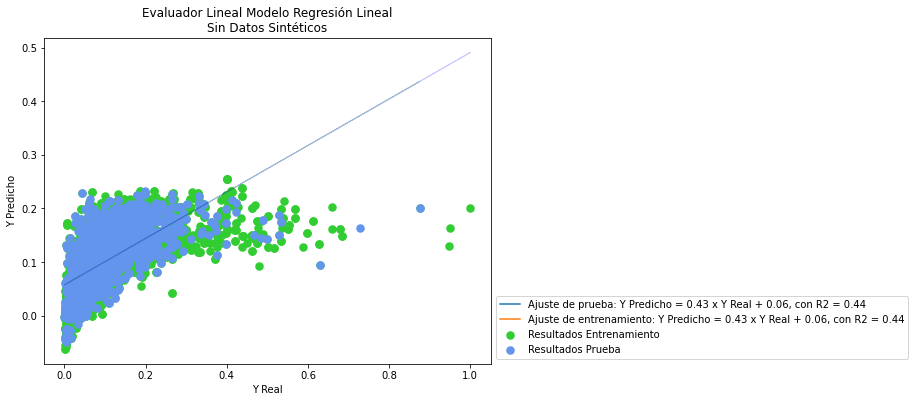

In [34]:
# Gráfico Evaluador Lineal

plt.figure(figsize=(8,6))

plt.title('Evaluador Lineal Modelo Regresión Lineal\nSin Datos Sintéticos')

plt.scatter(Y_real_entrenamiento, Y_predicho_entrenamiento, color='limegreen', linewidth=2.5, label = "Resultados Entrenamiento")
plt.scatter(Y_real_prueba, Y_predicho_prueba, color='cornflowerblue', linewidth=2.5, label = "Resultados Prueba")

plt.plot(Y_real_prueba, y_prueba, color='green', linewidth=1, alpha = 0.2)
plt.plot(Y_real_entrenamiento, y_entrenamiento, color='blue', linewidth=1, alpha = 0.2)

plt.plot([], [], '-', label=f"Ajuste de prueba: Y Predicho = {np.round(m_prueba, 2)} x Y Real + {np.round(b_prueba, 2)}, con R2 = {np.round(r2_score(Y_real_prueba, Y_predicho_prueba), 2)}")
plt.plot([], [], '-', label=f"Ajuste de entrenamiento: Y Predicho = {np.round(m_entrenamiento, 2)} x Y Real + {np.round(b_entrenamiento, 2)}, con R2 = {np.round(r2_score(Y_real_prueba, Y_predicho_prueba), 2)}")
plt.legend()

plt.xlabel("Y Real") #eje x
plt.ylabel("Y Predicho") #eje y

# Reubicar leyenda del gráfico
plt.legend(bbox_to_anchor=(1,0), loc = 'lower left')

plt.show()

### **4.2 Regresión Lineal con datos sintéticos**

In [35]:
# Asignar modelo a variable y entrenar modelo
Modelo_RegresionLineal = linear_model.LinearRegression()
Modelo_RegresionLineal.fit( atributos_entrenamiento, objetivos_entrenamiento)

# Obtener prediciones y evaluaciones de modelo
MSE_E, MAE_E, R2_E, MSE_P, MAE_P, R2_P, predicciones_entrenamiento, predicciones_prueba = evaluador(Modelo_RegresionLineal, atributos_entrenamiento, objetivos_entrenamiento, atributos_prueba, objetivos_prueba)

# Imprimir métricas
print('R2 entrenamiento ', round(R2_E,4),
      '\nR2 prueba', round(R2_P,4),
      '\nMAE entrenamiento', round(MAE_E,4),
      '\nMAE prueba', round(MSE_P,4),
      '\nMSE entrenamiento', round(MAE_E,4),
      '\nMSE prueba', round(MSE_P,4))

R2 entrenamiento  1.0 
R2 prueba 1.0 
MAE entrenamiento 0.0 
MAE prueba 0.0 
MSE entrenamiento 0.0 
MSE prueba 0.0


La métrica R2 mejora significativamente al incluir en el modelo los datos sintéticos. Abajo se muestra qué tanto se ajusta el modelo mediante el Evaluador Lineal.

In [36]:
# Definir Y_real y Y_predicho de entrenamiento y prueba

Y_real_entrenamiento = objetivos_entrenamiento
Y_predicho_entrenamiento = predicciones_entrenamiento
Y_real_prueba = objetivos_prueba
Y_predicho_prueba = predicciones_prueba
Estimador = linear_model.LinearRegression()
RLE_Prueba = Estimador.fit(Y_real_prueba, Y_predicho_prueba)
RLE_Entrenamiento = Estimador.fit(Y_real_entrenamiento, Y_predicho_entrenamiento)
m_prueba, b_prueba = np.asscalar(RLE_Prueba.coef_), np.asscalar(RLE_Prueba.intercept_)
m_entrenamiento, b_entrenamiento = np.asscalar(RLE_Entrenamiento.coef_), np.asscalar(RLE_Entrenamiento.intercept_)

In [37]:
# Graficar rectas de ajuste de subconjuntos de entrenamiento y de prueba

y_prueba = Y_real_prueba * m_prueba + b_prueba
y_entrenamiento = Y_real_entrenamiento * m_entrenamiento + b_entrenamiento

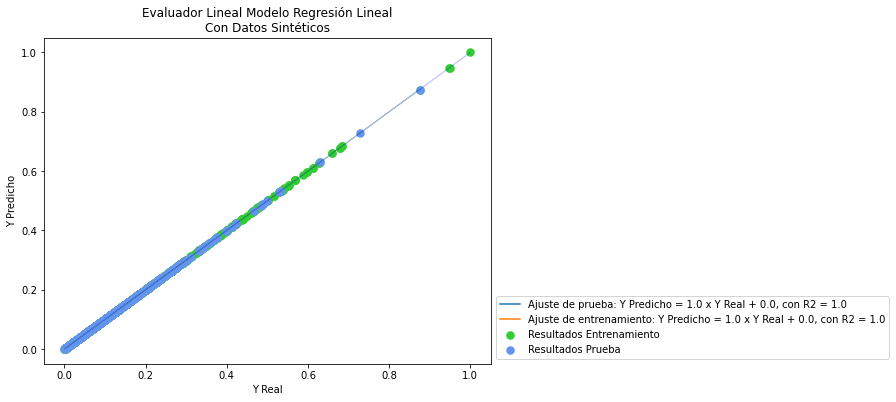

In [38]:
# Gráfico Evaluador Lineal

plt.figure(figsize=(8,6))

plt.title('Evaluador Lineal Modelo Regresión Lineal\nCon Datos Sintéticos')

plt.scatter(Y_real_entrenamiento, Y_predicho_entrenamiento, color='limegreen', linewidth=2.5, label = "Resultados Entrenamiento")
plt.scatter(Y_real_prueba, Y_predicho_prueba, color='cornflowerblue', linewidth=2.5, label = "Resultados Prueba")

plt.plot(Y_real_prueba, y_prueba, color='green', linewidth=1, alpha = 0.2)
plt.plot(Y_real_entrenamiento, y_entrenamiento, color='blue', linewidth=1, alpha = 0.2)

plt.plot([], [], '-', label=f"Ajuste de prueba: Y Predicho = {np.round(m_prueba, 2)} x Y Real + {np.round(b_prueba, 2)}, con R2 = {np.round(r2_score(Y_real_prueba, Y_predicho_prueba), 2)}")
plt.plot([], [], '-', label=f"Ajuste de entrenamiento: Y Predicho = {np.round(m_entrenamiento, 2)} x Y Real + {np.round(b_entrenamiento, 2)}, con R2 = {np.round(r2_score(Y_real_prueba, Y_predicho_prueba), 2)}")
plt.legend()

plt.xlabel("Y Real") #eje x
plt.ylabel("Y Predicho") #eje y

# Reubicar leyenda del gráfico
plt.legend(bbox_to_anchor=(1,0), loc = 'lower left')

plt.show()

### **4.3 Árboles Aleatorios sin datos sintéticos**

Se experimentará ahora con el modelo de árboles aleatorios (random forest) sin los datos sintéticos.

In [39]:
# Asignar modelo a variable y entrenar modelo
Modelo_RandomForest = RandomForestRegressor(n_estimators = 60, min_samples_split = 12, min_samples_leaf = 1, 
                                            max_samples = 1250, max_features = 0.5, max_depth = None,random_state = 42 )
Modelo_RandomForest.fit( atributos_entrenamiento.iloc[: , :-2], objetivos_entrenamiento )


# Obtener las métricas de evaluación con función creada evaluador
MSE_E, MAE_E, R2_E, MSE_P, MAE_P, R2_P, predicciones_entrenamiento, predicciones_prueba = evaluador(Modelo_RandomForest, atributos_entrenamiento.iloc[: , :-2], objetivos_entrenamiento, atributos_prueba.iloc[: , :-2], objetivos_prueba)

# Imprimir métricas
print('R2 entrenamiento ', round(R2_E,4),
      '\nR2 prueba', round(R2_P,4),
      '\nMAE entrenamiento', round(MAE_E,4),
      '\nMAE prueba', round(MSE_P,4),
      '\nMSE entrenamiento', round(MAE_E,4),
      '\nMSE prueba', round(MSE_P,4))

R2 entrenamiento  0.5903 
R2 prueba 0.5522 
MAE entrenamiento 0.0291 
MAE prueba 0.0022 
MSE entrenamiento 0.0291 
MSE prueba 0.0022


Como se observa en los experimentos el R2 de árboles aleatorios es mucho mejor que el R2 de regresión lineal, ambos sin datos sintéticos.

Evaluación de la contribución de cada atributo al resultado del modelo

<AxesSubplot:ylabel='feature'>

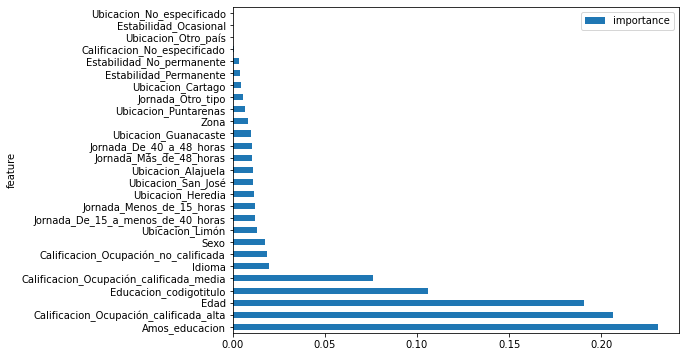

In [40]:
columnas_relevantes = pd.DataFrame({'feature' : atributos_entrenamiento.iloc[: , :-2].columns, 'importance':Modelo_RandomForest.feature_importances_})
columnas_relevantes = columnas_relevantes.sort_values('importance', ascending = False).set_index('feature')
columnas_relevantes.plot(kind='barh',figsize=(8, 6) )

Como se esperaba, los Atributos relacionados con el nivel educativo y la experiencia son los que más aportan a la predicción. A continuación, se aplica el Evaluador Lineal a este modelo.

In [41]:
# Definir Y_real y Y_predicho de entrenamiento y prueba

Y_real_entrenamiento = objetivos_entrenamiento
Y_predicho_entrenamiento = predicciones_entrenamiento
Y_real_prueba = objetivos_prueba
Y_predicho_prueba = predicciones_prueba
Estimador = linear_model.LinearRegression()
RLE_Prueba = Estimador.fit(Y_real_prueba, Y_predicho_prueba)
RLE_Entrenamiento = Estimador.fit(Y_real_entrenamiento, Y_predicho_entrenamiento)
m_prueba, b_prueba = np.asscalar(RLE_Prueba.coef_), np.asscalar(RLE_Prueba.intercept_)
m_entrenamiento, b_entrenamiento = np.asscalar(RLE_Entrenamiento.coef_), np.asscalar(RLE_Entrenamiento.intercept_)

In [42]:
# Graficar rectas de ajuste de subconjuntos de entrenamiento y de prueba

y_prueba = Y_real_prueba * m_prueba + b_prueba
y_entrenamiento = Y_real_entrenamiento * m_entrenamiento + b_entrenamiento

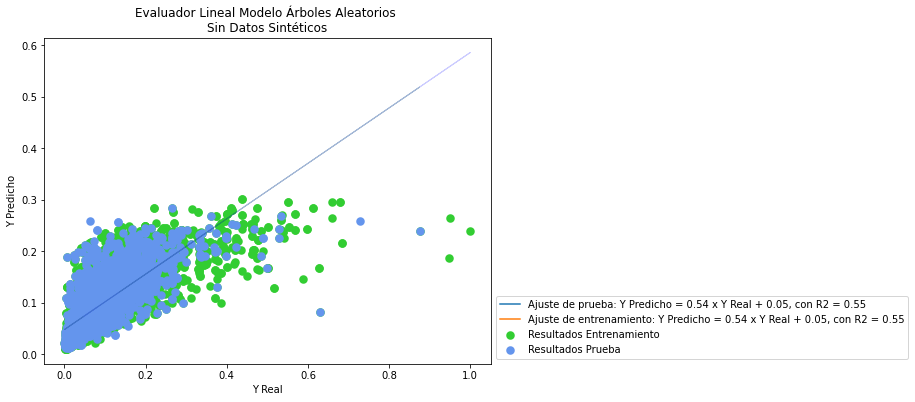

In [43]:
# Gráfico Evaluador Lineal

plt.figure(figsize=(8,6))

plt.title('Evaluador Lineal Modelo Árboles Aleatorios \nSin Datos Sintéticos')

plt.scatter(Y_real_entrenamiento, Y_predicho_entrenamiento, color='limegreen', linewidth=2.5, label = "Resultados Entrenamiento")
plt.scatter(Y_real_prueba, Y_predicho_prueba, color='cornflowerblue', linewidth=2.5, label = "Resultados Prueba")

plt.plot(Y_real_prueba, y_prueba, color='green', linewidth=1, alpha = 0.2)
plt.plot(Y_real_entrenamiento, y_entrenamiento, color='blue', linewidth=1, alpha = 0.2)

plt.plot([], [], '-', label=f"Ajuste de prueba: Y Predicho = {np.round(m_prueba, 2)} x Y Real + {np.round(b_prueba, 2)}, con R2 = {np.round(r2_score(Y_real_prueba, Y_predicho_prueba), 2)}")
plt.plot([], [], '-', label=f"Ajuste de entrenamiento: Y Predicho = {np.round(m_entrenamiento, 2)} x Y Real + {np.round(b_entrenamiento, 2)}, con R2 = {np.round(r2_score(Y_real_prueba, Y_predicho_prueba), 2)}")
plt.legend()

plt.xlabel("Y Real") #eje x
plt.ylabel("Y Predicho") #eje y

# Reubicar leyenda del gráfico
plt.legend(bbox_to_anchor=(1,0), loc = 'lower left')

plt.show()

### **4.3 Árboles Aleatorios con datos sintéticos**

In [44]:
# Asignar modelo a variable y entrenar modelo
Modelo_RandomForest = RandomForestRegressor(n_estimators = 60, min_samples_split = 12, min_samples_leaf = 1, 
                                            max_samples = 1250, max_features = 0.5, max_depth = None,random_state = 42 )
Modelo_RandomForest.fit( atributos_entrenamiento, objetivos_entrenamiento )


# Obtener las métricas de evaluación con función creada evaluador
MSE_E, MAE_E, R2_E, MSE_P, MAE_P, R2_P, predicciones_entrenamiento, predicciones_prueba = evaluador(Modelo_RandomForest, atributos_entrenamiento, objetivos_entrenamiento, atributos_prueba, objetivos_prueba)

# Imprimir métricas
print('R2 entrenamiento ', round(R2_E,4),
      '\nR2 prueba', round(R2_P,4),
      '\nMAE entrenamiento', round(MAE_E,4),
      '\nMAE prueba', round(MSE_P,4),
      '\nMSE entrenamiento', round(MAE_E,4),
      '\nMSE prueba', round(MSE_P,4))

R2 entrenamiento  0.9852 
R2 prueba 0.9873 
MAE entrenamiento 0.001 
MAE prueba 0.0001 
MSE entrenamiento 0.001 
MSE prueba 0.0001


Se demuesta que el uso de los datos sintéticos mejora sustancialmente el desempeño del modelo Árboles Aleatorios.

Evaluación de la contribución de cada atributo al resultado del modelo.

<AxesSubplot:ylabel='feature'>

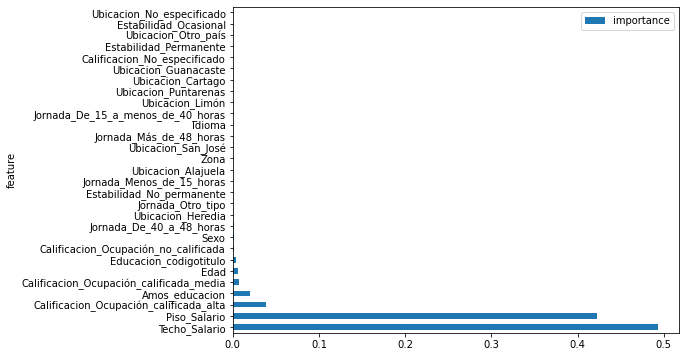

In [45]:
columnas_relevantes = pd.DataFrame({'feature' : atributos_entrenamiento.columns, 'importance':Modelo_RandomForest.feature_importances_})
columnas_relevantes = columnas_relevantes.sort_values('importance', ascending = False).set_index('feature')
columnas_relevantes.plot(kind='barh',figsize=(8, 6) )

Igual que el experimento de regresión lineal con datos sintéticos, la métrica R2 mejora considerablemente. Sin embargo la mejora del modelo en este momento depende de la inclusión de los datos sintéticos.

In [46]:
# Definir Y_real y Y_predicho de entrenamiento y prueba

Y_real_entrenamiento = objetivos_entrenamiento
Y_predicho_entrenamiento = predicciones_entrenamiento
Y_real_prueba = objetivos_prueba
Y_predicho_prueba = predicciones_prueba
Estimador = linear_model.LinearRegression()
RLE_Prueba = Estimador.fit(Y_real_prueba, Y_predicho_prueba)
RLE_Entrenamiento = Estimador.fit(Y_real_entrenamiento, Y_predicho_entrenamiento)
m_prueba, b_prueba = np.asscalar(RLE_Prueba.coef_), np.asscalar(RLE_Prueba.intercept_)
m_entrenamiento, b_entrenamiento = np.asscalar(RLE_Entrenamiento.coef_), np.asscalar(RLE_Entrenamiento.intercept_)

In [47]:
# Graficar rectas de ajuste de subconjuntos de entrenamiento y de prueba

y_prueba = Y_real_prueba * m_prueba + b_prueba
y_entrenamiento = Y_real_entrenamiento * m_entrenamiento + b_entrenamiento

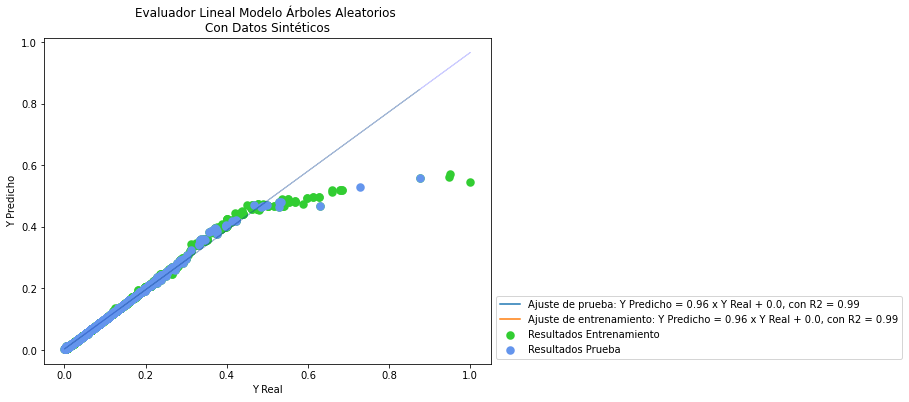

In [48]:
# Gráfico Evaluador Lineal

plt.figure(figsize=(8,6))

plt.title('Evaluador Lineal Modelo Árboles Aleatorios \nCon Datos Sintéticos')

plt.scatter(Y_real_entrenamiento, Y_predicho_entrenamiento, color='limegreen', linewidth=2.5, label = "Resultados Entrenamiento")
plt.scatter(Y_real_prueba, Y_predicho_prueba, color='cornflowerblue', linewidth=2.5, label = "Resultados Prueba")

plt.plot(Y_real_prueba, y_prueba, color='green', linewidth=1, alpha = 0.2)
plt.plot(Y_real_entrenamiento, y_entrenamiento, color='blue', linewidth=1, alpha = 0.2)

plt.plot([], [], '-', label=f"Ajuste de prueba: Y Predicho = {np.round(m_prueba, 2)} x Y Real + {np.round(b_prueba, 2)}, con R2 = {np.round(r2_score(Y_real_prueba, Y_predicho_prueba), 2)}")
plt.plot([], [], '-', label=f"Ajuste de entrenamiento: Y Predicho = {np.round(m_entrenamiento, 2)} x Y Real + {np.round(b_entrenamiento, 2)}, con R2 = {np.round(r2_score(Y_real_prueba, Y_predicho_prueba), 2)}")
plt.legend()

plt.xlabel("Y Real") #eje x
plt.ylabel("Y Predicho") #eje y

# Reubicar leyenda del gráfico
plt.legend(bbox_to_anchor=(1,0), loc = 'lower left')

plt.show()

### **4.4 Optimización de hiperparámetros para Árboles Aleatorios sin datos sintéticos** 

Para optimizar los hiperparámetros se utiliza la función RandomizedSearchCV de la librería Scikit Learn. Para ello, es necesario definiremos los rangos de los hiperparámetros a optimizar.

In [49]:
grid = {
    'n_estimators':np.arange(100,200,20),
    "max_depth":np.arange(20,400,20),
    "min_samples_leaf":np.arange(1,5,1),
    "max_features":['auto', 'sqrt', 'log2']}

randomForest_model = RandomizedSearchCV(RandomForestRegressor(
                     random_state=42),
                    param_distributions = grid,
                     n_iter=5,
                    cv=5,
                    verbose=True)
randomForest_model.fit(atributos_entrenamiento.iloc[: , :-2],objetivos_entrenamiento)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240, 260,
       280, 300, 320, 340, 360, 380]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'n_estimators': array([100, 120, 140, 160, 180])},
                   verbose=True)

Imprimir la combinación de hiperparámetros calculada.

In [50]:
randomForest_model.best_params_

{'n_estimators': 180,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 100}

Introduciendo los mejores hiperpámetros al modelo para evaluar resultados.

In [51]:
# Asignar modelo a variable y entrenar modelo
Modelo_RandomForest = RandomForestRegressor(n_estimators = 180, min_samples_leaf = 3, 
                                            max_features = 'auto', max_depth = 100, random_state = 42 )
Modelo_RandomForest.fit( atributos_entrenamiento.iloc[: , :-2], objetivos_entrenamiento )


# Obtener las métricas de evaluación con función creada evaluador
MSE_E, MAE_E, R2_E, MSE_P, MAE_P, R2_P, predicciones_entrenamiento, predicciones_prueba = evaluador(Modelo_RandomForest, atributos_entrenamiento.iloc[: , :-2], objetivos_entrenamiento, atributos_prueba.iloc[: , :-2], objetivos_prueba)

# Imprimir métricas
print('R2 entrenamiento ', round(R2_E,4),
      '\nR2 prueba', round(R2_P,4),
      '\nMAE entrenamiento', round(MAE_E,4),
      '\nMAE prueba', round(MSE_P,4),
      '\nMSE entrenamiento', round(MAE_E,4),
      '\nMSE prueba', round(MSE_P,4))

R2 entrenamiento  0.956 
R2 prueba 0.7931 
MAE entrenamiento 0.0085 
MAE prueba 0.001 
MSE entrenamiento 0.0085 
MSE prueba 0.001


Con la función `feature_importances_` se visualizarán las columnas más importantes para el modelo

<AxesSubplot:ylabel='feature'>

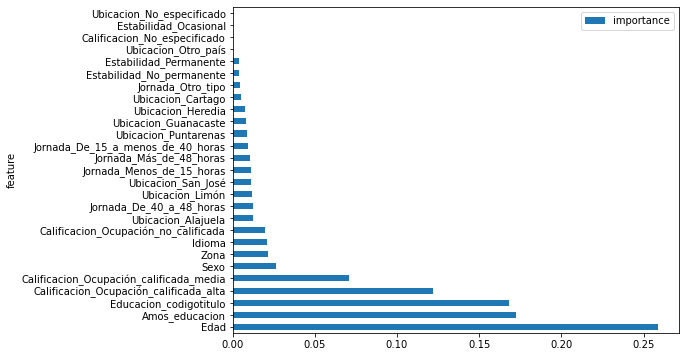

In [52]:
columnas_relevantes = pd.DataFrame({'feature' : atributos_entrenamiento.iloc[: , :-2].columns, 'importance':Modelo_RandomForest.feature_importances_})
columnas_relevantes = columnas_relevantes.sort_values('importance', ascending = False).set_index('feature')
columnas_relevantes.plot(kind='barh',figsize=(8, 6) )

Aplicando el Evaluador Lineal a este modelo.

In [53]:
# Definir Y_real y Y_predicho de entrenamiento y prueba

Y_real_entrenamiento = objetivos_entrenamiento
Y_predicho_entrenamiento = predicciones_entrenamiento
Y_real_prueba = objetivos_prueba
Y_predicho_prueba = predicciones_prueba
Estimador = linear_model.LinearRegression()
RLE_Prueba = Estimador.fit(Y_real_prueba, Y_predicho_prueba)
RLE_Entrenamiento = Estimador.fit(Y_real_entrenamiento, Y_predicho_entrenamiento)
m_prueba, b_prueba = np.asscalar(RLE_Prueba.coef_), np.asscalar(RLE_Prueba.intercept_)
m_entrenamiento, b_entrenamiento = np.asscalar(RLE_Entrenamiento.coef_), np.asscalar(RLE_Entrenamiento.intercept_)

In [54]:
# Graficar rectas de ajuste de subconjuntos de entrenamiento y de prueba

y_prueba = Y_real_prueba * m_prueba + b_prueba
y_entrenamiento = Y_real_entrenamiento * m_entrenamiento + b_entrenamiento

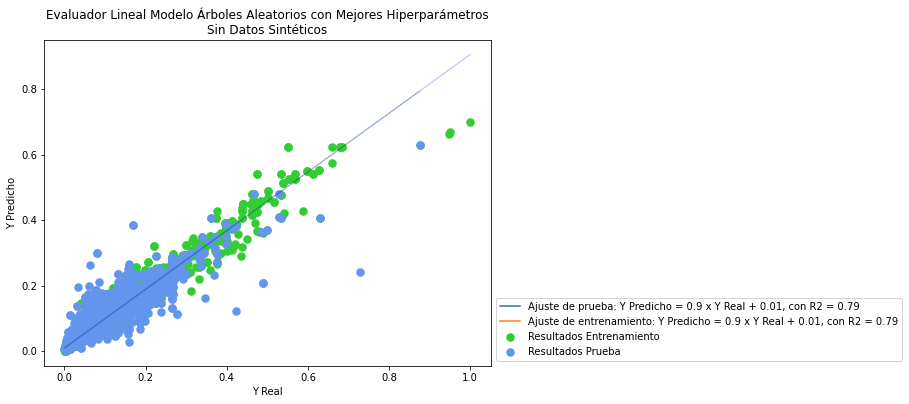

In [55]:
# Gráfico Evaluador Lineal

plt.figure(figsize=(8,6))

plt.title('Evaluador Lineal Modelo Árboles Aleatorios con Mejores Hiperparámetros\nSin Datos Sintéticos')

plt.scatter(Y_real_entrenamiento, Y_predicho_entrenamiento, color='limegreen', linewidth=2.5, label = "Resultados Entrenamiento")
plt.scatter(Y_real_prueba, Y_predicho_prueba, color='cornflowerblue', linewidth=2.5, label = "Resultados Prueba")

plt.plot(Y_real_prueba, y_prueba, color='green', linewidth=1, alpha = 0.2)
plt.plot(Y_real_entrenamiento, y_entrenamiento, color='blue', linewidth=1, alpha = 0.2)

plt.plot([], [], '-', label=f"Ajuste de prueba: Y Predicho = {np.round(m_prueba, 2)} x Y Real + {np.round(b_prueba, 2)}, con R2 = {np.round(r2_score(Y_real_prueba, Y_predicho_prueba), 2)}")
plt.plot([], [], '-', label=f"Ajuste de entrenamiento: Y Predicho = {np.round(m_entrenamiento, 2)} x Y Real + {np.round(b_entrenamiento, 2)}, con R2 = {np.round(r2_score(Y_real_prueba, Y_predicho_prueba), 2)}")
plt.legend()

plt.xlabel("Y Real") #eje x
plt.ylabel("Y Predicho") #eje y

# Reubicar leyenda del gráfico
plt.legend(bbox_to_anchor=(1,0), loc = 'lower left')

plt.show()

### **4.5 Busqueda de Mejores parámetros para Árboles Aleatorios con datos sintéticos** 

Para optimizar los hiperparámetros se utiliza la función RandomizedSearchCV de la librería Scikit Learn. Para ello, es necesario definiremos los rangos de los hiperparámetros a optimizar.

In [56]:
grid = {
    'n_estimators':np.arange(100,200,20),
    "max_depth":np.arange(20,400,20),
    "min_samples_leaf":np.arange(1,5,1),
    "max_features":['auto', 'sqrt', 'log2']}

randomForest_model = RandomizedSearchCV(RandomForestRegressor(
                     random_state=42),
                    param_distributions = grid,
                     n_iter=5,
                    cv=5,
                    verbose=True)
randomForest_model.fit(atributos_entrenamiento,objetivos_entrenamiento)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240, 260,
       280, 300, 320, 340, 360, 380]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'n_estimators': array([100, 120, 140, 160, 180])},
                   verbose=True)

Introduciendo los mejores hiperpámetros al modelo para evaluar resultados.

In [57]:
randomForest_model.best_params_

{'n_estimators': 180,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 320}

Aplicaremos los mejores hiperpámetros al modelo para evaluar resultados.

In [58]:
# Asignar modelo a variable y entrenar modelo
Modelo_RandomForest = RandomForestRegressor(n_estimators = 180, min_samples_leaf = 2, 
                                            max_features = 'auto', max_depth = 320, random_state = 42 )
Modelo_RandomForest.fit( atributos_entrenamiento, objetivos_entrenamiento )


# Obtener las métricas de evaluación con función creada evaluador
MSE_E, MAE_E, R2_E, MSE_P, MAE_P, R2_P, predicciones_entrenamiento, predicciones_prueba = evaluador(Modelo_RandomForest, atributos_entrenamiento, objetivos_entrenamiento, atributos_prueba, objetivos_prueba)

# Imprimir métricas
print('R2 entrenamiento ', round(R2_E,4),
      '\nR2 prueba', round(R2_P,4),
      '\nMAE entrenamiento', round(MAE_E,4),
      '\nMAE prueba', round(MSE_P,4),
      '\nMSE entrenamiento', round(MAE_E,4),
      '\nMSE prueba', round(MSE_P,4))

R2 entrenamiento  1.0 
R2 prueba 0.9998 
MAE entrenamiento 0.0 
MAE prueba 0.0 
MSE entrenamiento 0.0 
MSE prueba 0.0


Con la función `feature_importances_` se visualizarán las columnas más importantes para el modelo

<AxesSubplot:ylabel='feature'>

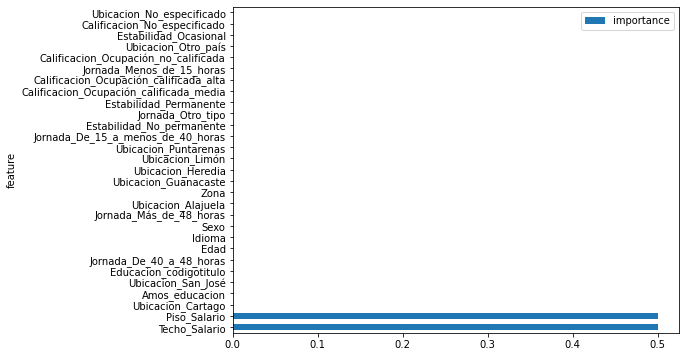

In [59]:
columnas_relevantes = pd.DataFrame({'feature' : atributos_entrenamiento.columns, 'importance':Modelo_RandomForest.feature_importances_})
columnas_relevantes = columnas_relevantes.sort_values('importance', ascending = False).set_index('feature')
columnas_relevantes.plot(kind='barh',figsize=(8, 6) )

Aplicando el Evaluador Lineal a este modelo.

In [60]:
# Definir Y_real y Y_predicho de entrenamiento y prueba

Y_real_entrenamiento = objetivos_entrenamiento
Y_predicho_entrenamiento = predicciones_entrenamiento
Y_real_prueba = objetivos_prueba
Y_predicho_prueba = predicciones_prueba
Estimador = linear_model.LinearRegression()
RLE_Prueba = Estimador.fit(Y_real_prueba, Y_predicho_prueba)
RLE_Entrenamiento = Estimador.fit(Y_real_entrenamiento, Y_predicho_entrenamiento)
m_prueba, b_prueba = np.asscalar(RLE_Prueba.coef_), np.asscalar(RLE_Prueba.intercept_)
m_entrenamiento, b_entrenamiento = np.asscalar(RLE_Entrenamiento.coef_), np.asscalar(RLE_Entrenamiento.intercept_)

In [61]:
# Graficar rectas de ajuste de subconjuntos de entrenamiento y de prueba

y_prueba = Y_real_prueba * m_prueba + b_prueba
y_entrenamiento = Y_real_entrenamiento * m_entrenamiento + b_entrenamiento

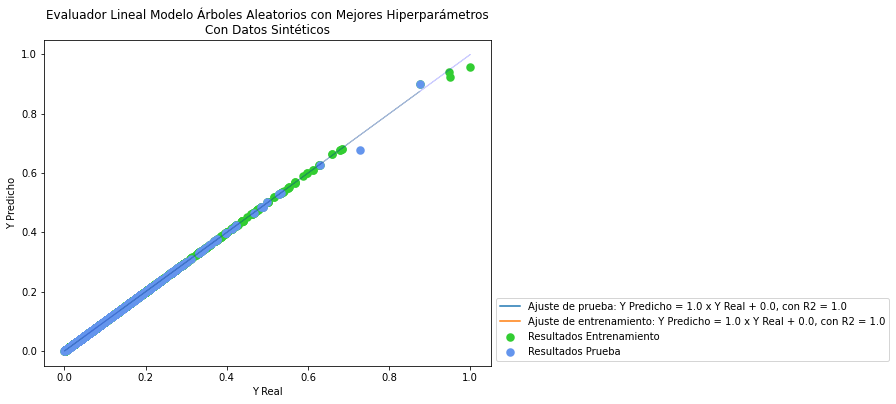

In [62]:
# Gráfico Evaluador Lineal

plt.figure(figsize=(8,6))

plt.title('Evaluador Lineal Modelo Árboles Aleatorios con Mejores Hiperparámetros\nCon Datos Sintéticos')

plt.scatter(Y_real_entrenamiento, Y_predicho_entrenamiento, color='limegreen', linewidth=2.5, label = "Resultados Entrenamiento")
plt.scatter(Y_real_prueba, Y_predicho_prueba, color='cornflowerblue', linewidth=2.5, label = "Resultados Prueba")

plt.plot(Y_real_prueba, y_prueba, color='green', linewidth=1, alpha = 0.2)
plt.plot(Y_real_entrenamiento, y_entrenamiento, color='blue', linewidth=1, alpha = 0.2)

plt.plot([], [], '-', label=f"Ajuste de prueba: Y Predicho = {np.round(m_prueba, 2)} x Y Real + {np.round(b_prueba, 2)}, con R2 = {np.round(r2_score(Y_real_prueba, Y_predicho_prueba), 2)}")
plt.plot([], [], '-', label=f"Ajuste de entrenamiento: Y Predicho = {np.round(m_entrenamiento, 2)} x Y Real + {np.round(b_entrenamiento, 2)}, con R2 = {np.round(r2_score(Y_real_prueba, Y_predicho_prueba), 2)}")
plt.legend()

plt.xlabel("Y Real") #eje x
plt.ylabel("Y Predicho") #eje y

# Reubicar leyenda del gráfico
plt.legend(bbox_to_anchor=(1,0), loc = 'lower left')

plt.show()

# **5. Resultados Finales** 

El mejor modelo para este experimento fue el modelo de Árboles Aleatorios con los datos sintéticos (Salario Piso y  Salario Techo). Es importante resaltar que los rangos (Piso y Techo) fueron creados a partir del mismo conjunto de datos dado que el dataset original no los definía y que, si se añaden al conjunto de datos introducido al modelo, se disminuye el error al máximo.

### **5.1 Reversión de escalimiento**

Para obtener valores de Ingreso Bruto en una escala entedible por los humanos, es necesario transformar a la inversa de como se hizo anteriormente. La fórmula se obtiene al despejar el valor sin tranformar de la ecuación de transformación.

In [63]:
resultados_prueba = pd.DataFrame(objetivos_prueba)
resultados_prueba.rename(columns={'Ingreso_bruto_total_trabajo': 'Ingreso_bruto_total_trabajo_real'}, inplace=True)
resultados_prueba['Ingreso_bruto_total_trabajo_predic'] = predicciones_prueba
resultados_prueba.head()

,Ingreso_bruto_total_trabajo_real,Ingreso_bruto_total_trabajo_predic
10221,0.1364,0.1365
12569,0.2399,0.2399
11727,0.1457,0.1457
10166,0.0620,0.0620
14606,0.0541,0.0541


Revertiendo el escalamiento aplicado en el preprocesamiento, divido en 2 partes:
 primero aplicando la antitransformada a las 2 columnas de predicciones.

In [64]:
re_escalamiento_y = resultados_prueba * ( np.asscalar(maximo[-1:]) - np.asscalar(minimo[-1:])) + np.asscalar(minimo[-1:])
re_escalamiento_y.head()


,Ingreso_bruto_total_trabajo_real,Ingreso_bruto_total_trabajo_predic
10221,"1,186,450.0000","1,186,921.1458"
12569,"2,083,333.3333","2,083,213.5417"
11727,"1,267,083.3333","1,266,992.1875"
10166,"541,666.6667","541,666.6667"
14606,"473,958.3333","473,927.5438"


Segundo, aplicar la antitransformada a los atributos de prueba del conjunto de datos.

In [65]:
re_escalamiento_x = atributos_prueba * ( maximo[:-1] - minimo[:-1] ) + minimo[:-1]
re_escalamiento_x.head()

,Edad,Sexo,Idioma,Zona,Educacion_codigotitulo,Amos_educacion,Calificacion_No_especificado,Calificacion_Ocupación_calificada_alta,Calificacion_Ocupación_calificada_media,Calificacion_Ocupación_no_calificada,...,Jornada_De_15_a_menos_de_40_horas,Jornada_De_40_a_48_horas,Jornada_Menos_de_15_horas,Jornada_Más_de_48_horas,Jornada_Otro_tipo,Estabilidad_No_permanente,Estabilidad_Ocasional,Estabilidad_Permanente,Piso_Salario,Techo_Salario
10221,32.0000,1.0000,0.0000,1.0000,72.0000,16.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,"320,458.4292","2,052,441.5708"
12569,58.0000,1.0000,1.0000,1.0000,31.0000,22.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,"562,705.3205","3,603,961.3462"
11727,34.0000,1.0000,0.0000,1.0000,31.0000,16.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,"342,237.3759","2,191,929.2907"
10166,29.0000,0.0000,0.0000,0.0000,37.0000,12.0000,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,"146,303.3833","937,029.9500"
14606,25.0000,0.0000,0.0000,1.0000,25.0000,13.0000,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,"128,015.4604","819,901.2063"


Ahora, se unirán X e Y en sólo conjunto de datos.

In [66]:
df_predic = pd.concat([re_escalamiento_x,re_escalamiento_y ], axis = 1)
df_predic.head()

,Edad,Sexo,Idioma,Zona,Educacion_codigotitulo,Amos_educacion,Calificacion_No_especificado,Calificacion_Ocupación_calificada_alta,Calificacion_Ocupación_calificada_media,Calificacion_Ocupación_no_calificada,...,Jornada_Menos_de_15_horas,Jornada_Más_de_48_horas,Jornada_Otro_tipo,Estabilidad_No_permanente,Estabilidad_Ocasional,Estabilidad_Permanente,Piso_Salario,Techo_Salario,Ingreso_bruto_total_trabajo_real,Ingreso_bruto_total_trabajo_predic
10221,32.0000,1.0000,0.0000,1.0000,72.0000,16.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,"320,458.4292","2,052,441.5708","1,186,450.0000","1,186,921.1458"
12569,58.0000,1.0000,1.0000,1.0000,31.0000,22.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,"562,705.3205","3,603,961.3462","2,083,333.3333","2,083,213.5417"
11727,34.0000,1.0000,0.0000,1.0000,31.0000,16.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,"342,237.3759","2,191,929.2907","1,267,083.3333","1,266,992.1875"
10166,29.0000,0.0000,0.0000,0.0000,37.0000,12.0000,0.0000,0.0000,1.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,"146,303.3833","937,029.9500","541,666.6667","541,666.6667"
14606,25.0000,0.0000,0.0000,1.0000,25.0000,13.0000,0.0000,0.0000,1.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,"128,015.4604","819,901.2063","473,958.3333","473,927.5438"


###  **5.2 Conclusiones finales**

Para finalizar, se comparará visualmente cómo se compartaron nuestras prediciones sin datos sintéticos comparadas con los objetivos; esto para el conjunto de entrenamiento, que fueron los datos que el modelo no vio. Se compararán los salarios brutos reales contra las prediciones en función de los años de estudio y la ubicación.

Salario bruto en función de los Años de Estudio

In [67]:
pivot = pd.pivot_table(df_predic, index = 'Amos_educacion', 
                       values = ['Ingreso_bruto_total_trabajo_real', 'Ingreso_bruto_total_trabajo_predic'], 
                       aggfunc='sum')
pivot

,Ingreso_bruto_total_trabajo_predic,Ingreso_bruto_total_trabajo_real
Amos_educacion,,
7.0000,"788,450.1625","788,333.3333"
8.0000,"6,938,304.5474","6,937,906.6667"
9.0000,"8,148,054.0583","8,147,950.0000"
10.0000,"4,674,792.6068","4,674,773.3333"
11.0000,"1,388,793.9115","1,388,416.6667"
12.0000,"159,680,503.7891","159,678,394.2500"
13.0000,"197,168,468.0145","197,190,300.2500"
14.0000,"255,191,819.7721","255,194,411.8333"
15.0000,"569,043,518.0708","569,036,272.6667"


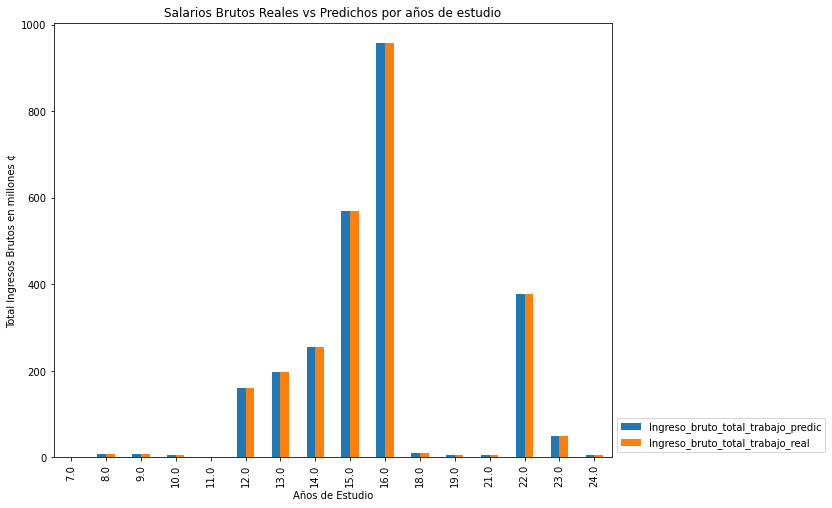

In [68]:
pivot['Ingreso_bruto_total_trabajo_predic'] = pivot['Ingreso_bruto_total_trabajo_predic'] / 1_000_000
pivot['Ingreso_bruto_total_trabajo_real'] = pivot['Ingreso_bruto_total_trabajo_real'] / 1_000_000

pivot.plot(kind='bar', figsize=(10,8))
plt.title('Salarios Brutos Reales vs Predichos por años de estudio')
plt.xlabel('Años de Estudio')
plt.ylabel('Total Ingresos Brutos en millones ¢')

# Reubicar leyenda del gráfico
plt.legend(bbox_to_anchor=(1,0), loc = 'lower left')

Salario bruto en función de los Años de Estudio y la Provincia

Reversión del One-hot Enconding con las columnas de Ubicación

In [71]:
df_pivot2 = df_predic[['Ubicacion_Alajuela',
       'Ubicacion_Cartago', 'Ubicacion_Guanacaste', 'Ubicacion_Heredia',
       'Ubicacion_Limón', 'Ubicacion_No_especificado', 'Ubicacion_Otro_país',
       'Ubicacion_Puntarenas', 'Ubicacion_San_José']]
df_pivot2['Provincia'] = df_pivot2.idxmax(1).astype('string')
df_pivot2 = df_pivot2['Provincia']
df_pivot2 = df_pivot2.str[10:]
df_predic['Provincia'] = df_pivot2
df_pivot3 = df_predic[['Amos_educacion', 'Provincia', 'Ingreso_bruto_total_trabajo_predic' ]]
df_pivot3['Provincia'].replace(regex= 'San_José', value='1', inplace = True)
df_pivot3['Provincia'].replace(regex= 'Alajuela', value='2', inplace = True)
df_pivot3['Provincia'].replace(regex= 'Cartago', value='3', inplace = True)
df_pivot3['Provincia'].replace(regex= 'Heredia', value='4', inplace = True)
df_pivot3['Provincia'].replace(regex= 'Guanacaste', value='5', inplace = True)
df_pivot3['Provincia'].replace(regex= 'Puntarenas', value='6', inplace = True)
df_pivot3['Provincia'].replace(regex= 'Limón', value='7', inplace = True)
df_pivot3['Provincia'].replace(regex= 'Otro_país', value='8', inplace = True)
df_pivot3['Provincia'].replace(regex= 'No_especificado', value='9', inplace = True)
df_pivot3['Provincia'].astype('int')
df_pivot3.head()

,Amos_educacion,Provincia,Ingreso_bruto_total_trabajo_predic
10221,16.0000,1,"1,186,921.1458"
12569,22.0000,1,"2,083,213.5417"
11727,16.0000,2,"1,266,992.1875"
10166,12.0000,1,"541,666.6667"
14606,13.0000,7,"473,927.5438"


Superficie generada

El siguiente gráfico representa la variación de los ingresos brutos en función de la provincia y los años de estudio

In [72]:
#Diccionario con los nombres de las provincias
prov_dict = { 1 : 'San_José'
            , 2 : 'Alajuela'
            , 3 : 'Cartago'
            , 4 : 'Heredia'
            , 5 : 'Guanacaste'
            , 6 : 'Puntarenas'
            , 7 : 'Limón'
            , 8 : 'Otro_país'
            , 9 : 'No_especificado'
}

#Lista de nombres de provincia
nombre_prov = prov_dict.values()

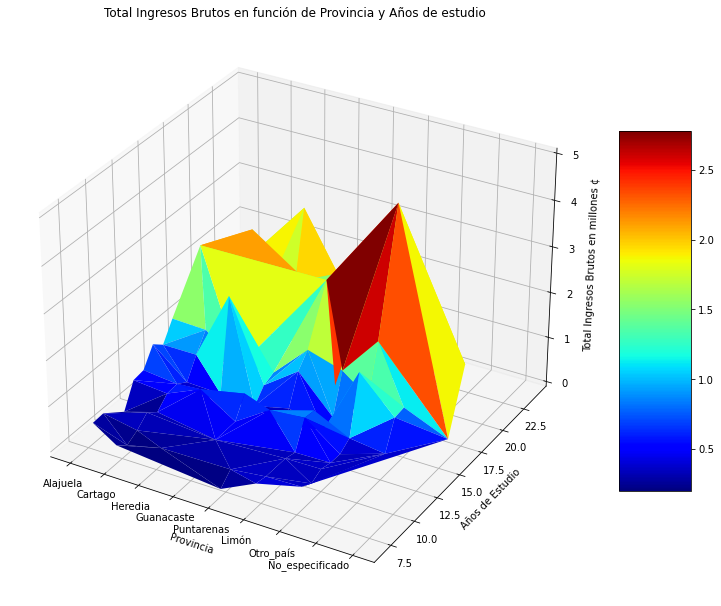

In [73]:
x = df_pivot3['Provincia']
y = df_pivot3['Amos_educacion'] 
z = df_pivot3['Ingreso_bruto_total_trabajo_predic'] / 1_000_000

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1, antialiased = True)
plt.title('Total Ingresos Brutos en función de Provincia y Años de estudio')
ax.set_xlabel('Provincia')
ax.set_xticklabels(nombre_prov, rotation='horizontal')
ax.set_ylabel('Años de Estudio')
ax.set_zlabel('Total Ingresos Brutos en millones ¢')
ax.set_zlim(0, 5)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

El mejor resultado viene dado por el máximo en los ingresos, para obtiener el tiempo de estudio y la provincia ideales

In [74]:
Mejor_resultado = df_pivot3[df_pivot3['Ingreso_bruto_total_trabajo_predic'] == df_pivot3['Ingreso_bruto_total_trabajo_predic'].max()]
Mejor_resultado

,Amos_educacion,Provincia,Ingreso_bruto_total_trabajo_predic
11160,22.0000,1,"7,786,040.0260"


Esto quiere decir que el mejor salario corresponde a ¢7.8 millones y se obtendría con un puesto en San José tras 22 años de estudio.